# Part II - Netflix Dataset Presentation
## by Mahmoud Shoman

## Investigation Overview
The goal of this presentation is to provide insights into the Netflix Titles dataset, focusing on trends, patterns, and relationships within Netflix's content library. The presentation will highlight the distribution of Movies and TV Shows, audience ratings, release year trends, and regional diversity in content production.

### Key Insights
1. **Movies vs. TV Shows**:
   - Movies dominate Netflix’s catalog, but TV Shows have grown significantly in recent years.
   
2. **Audience Ratings**:
   - TV-MA and TV-14 are the most common ratings, reflecting Netflix’s focus on mature and teenage audiences.

3. **Content Trends Over Time**:
   - Most content was released after 2010, with Netflix focusing on recent productions.

4. **Regional Diversity**:
   - The United States leads in content production, while countries like India specialize in TV Shows.
   - Smaller countries contribute niche content to Netflix’s global catalog.

## Dataset Overview and Executive Summary
The dataset, `netflix_titles.csv`, contains 8,807 entries and 12 features about Netflix’s streaming content, including movies and TV shows. Key columns include:
- `type`: Identifies whether the content is a Movie or TV Show.
- `release_year`: Indicates the year the content was released.
- `rating`: Provides audience classification (e.g., TV-MA, PG-13).
- `country`: Highlights the country where the content was produced.
- `listed_in`: Represents genres or categories associated with the content.

### Summary of Findings
1. **Dominance of Movies**:
   - Movies outnumber TV Shows on Netflix, with over 60% of the catalog dedicated to films.

2. **Recent Content Focus**:
   - A significant portion of the content was released after 2010, reflecting Netflix’s strategy of producing and acquiring contemporary titles.

3. **Popular Genres**:
   - Dramas and Comedies are the most common genres, showcasing Netflix’s diverse appeal.

4. **Regional Leaders**:
   - The United States and India are the top contributors, with the US leading in diversity and India focusing on TV Shows.

5. **Ratings for Target Audiences**:
   - TV-MA and TV-14 dominate, indicating Netflix's focus on mature and teenage audiences.

In [37]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [38]:
# Load the dataset into a pandas dataframe
file_path = "netflix_titles.csv"  # Replace with your file path if different
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Visualization 1: Top 10 Countries Contributing to Netflix Content
This visualization highlights the top 10 countries contributing the most to Netflix’s content library. It provides insights into the geographic diversity of Netflix’s offerings and identifies key regions producing Movies and TV Shows.


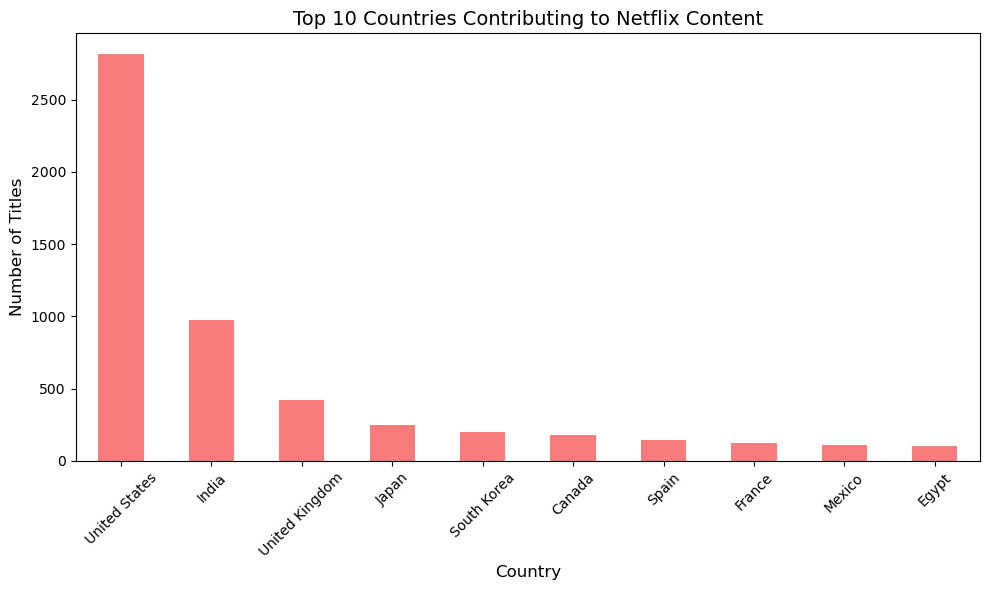

In [39]:
# Aggregate content by country
top_countries = df['country'].value_counts().nlargest(10)

# Plot the top 10 countries contributing to Netflix content
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='#f87c7c')

# Add titles and labels
plt.title('Top 10 Countries Contributing to Netflix Content', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


**Observation:** The United States leads as the top contributor to Netflix’s content library, followed by India and the United Kingdom. These countries dominate both Movies and TV Shows, reflecting their strong production industries. The geographic diversity highlights Netflix’s global strategy of acquiring content from various regions.

## Visualization 2: Growth of Netflix’s Content Library Over Time

This visualization examines how Netflix's catalog of Movies and TV Shows has grown over the years, highlighting the company’s increasing focus on adding new content.


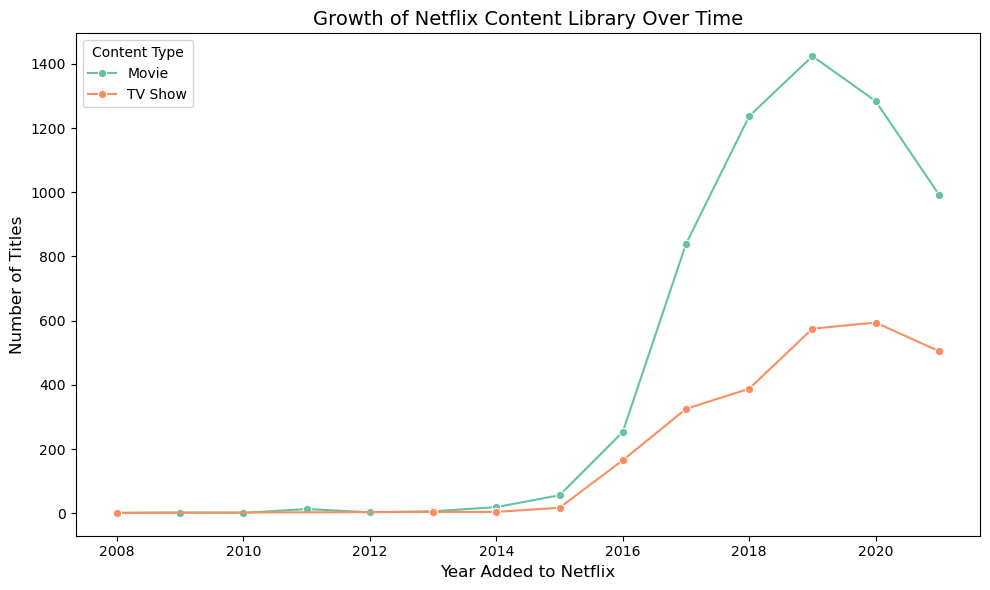

In [40]:

# Convert 'date_added' to datetime and extract the year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Group by year and type
content_growth = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Plot the growth of Netflix's content library
plt.figure(figsize=(10, 6))
sns.lineplot(data=content_growth, x='year_added', y='count', hue='type', marker='o', palette='Set2')

# Add titles and labels
plt.title('Growth of Netflix Content Library Over Time', fontsize=14)
plt.xlabel('Year Added to Netflix', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Content Type')

# Show the plot
plt.tight_layout()
plt.show()

**Observation:** The growth of Netflix’s content library over time shows a significant increase after 2015, reflecting the platform’s aggressive expansion strategy. Both Movies and TV Shows exhibit upward trends, but TV Shows have grown at a faster rate in recent years, aligning with Netflix’s focus on original series production.

## Visualization 3: Stacked Bar Chart of Ratings by Content Type
This visualization displays the distribution of audience ratings across Movies and TV Shows, providing insights into how ratings vary between content types.


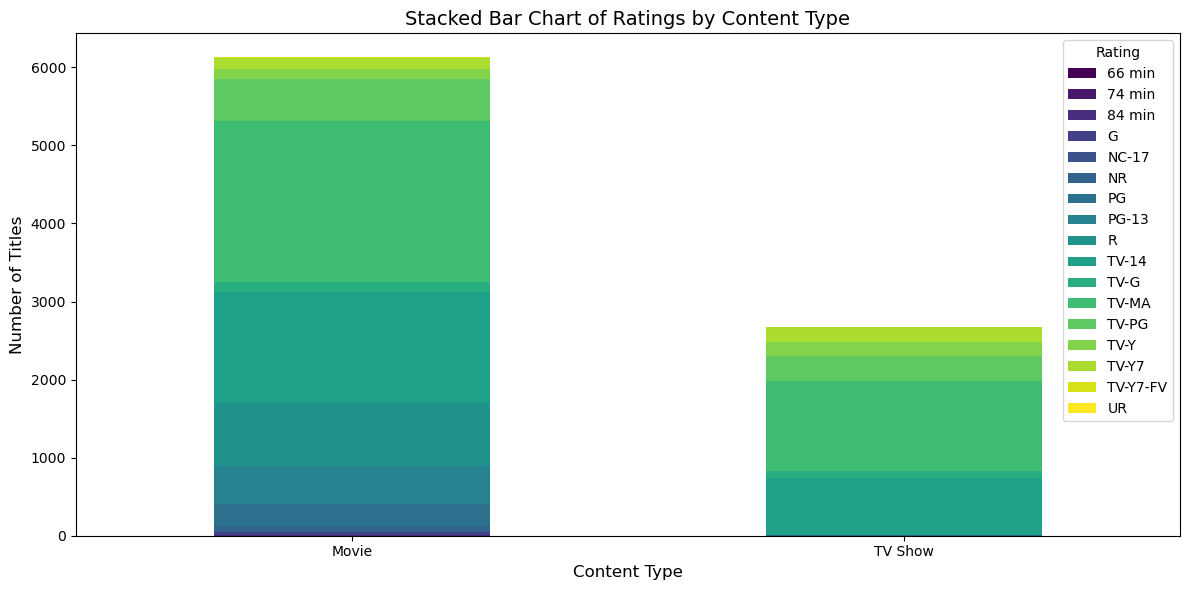

In [41]:
# Group data by type and rating
ratings_by_type = df.groupby(['type', 'rating']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ratings_by_type.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add titles and labels
plt.title('Stacked Bar Chart of Ratings by Content Type', fontsize=14)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Rating', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

**Observation:** The stacked bar chart shows that Movies have a broader distribution of ratings, including PG, R, and G, whereas TV Shows are heavily concentrated in ratings like TV-MA and TV-14. This highlights Netflix’s strategy to target specific audience segments with its TV Show offerings while maintaining a diverse catalog for Movies.

## Visualization 4: Density Plot of Movie Durations
This density plot focuses solely on the distribution of durations for Movies on Netflix, highlighting typical lengths for films in the catalog.


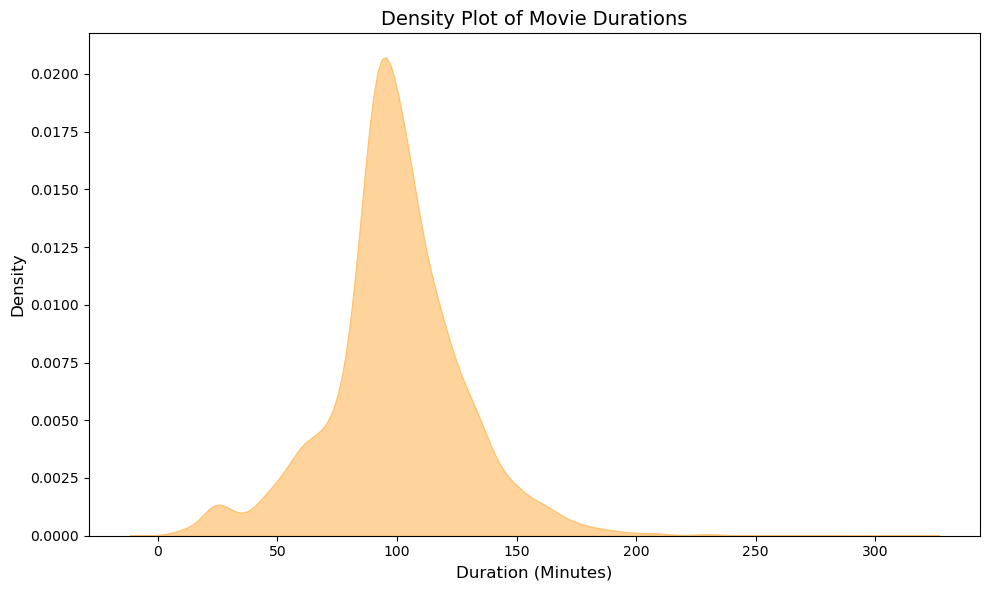

In [43]:
# Filter the dataset for Movies and extract numeric duration
movies = df[df['type'] == 'Movie']
movies['duration_numeric'] = movies['duration'].str.extract('(\d+)').astype(float)

# Plot the density distribution of movie durations
plt.figure(figsize=(10, 6))
sns.kdeplot(data=movies, x='duration_numeric', fill=True, alpha=0.7, color='#ffc372')

# Add titles and labels
plt.title('Density Plot of Movie Durations', fontsize=14)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

**Observation:** The density plot reveals that most Movies on Netflix have durations ranging between 80–120 minutes, with a peak around 100 minutes. This aligns with typical feature-length film standards, suggesting a preference for standard-length movies in Netflix's catalog.

## Conclusion

Netflix's catalog is dominated by Movies, which account for over 60% of the total content. However, TV Shows have grown significantly in recent years, reflecting Netflix's increased investment in original series. This shift highlights the platform's evolving strategy to attract a broader audience by diversifying its content offerings.

Audience ratings reveal that TV-MA and TV-14 are the most common, emphasizing Netflix's focus on mature and teenage viewers. While TV Shows tend to cluster around these two ratings, Movies exhibit a broader range, catering to a more diverse audience demographic. This balance between targeted and varied content ensures that Netflix appeals to a wide range of viewers globally.

A significant portion of Netflix's content was released after 2000, with a concentration in the 2010s. This trend aligns with the platform’s focus on acquiring contemporary titles and producing new originals, marking its transformation into a leading content producer. The United States is the largest contributor to Netflix's catalog, followed by India and the United Kingdom. These countries dominate the platform’s offerings, with regional preferences evident in their focus on specific genres and content types.

An analysis of movie durations shows that most feature films on Netflix are between 80–120 minutes long, aligning with industry standards for feature-length films. This consistency reflects Netflix's commitment to offering traditional cinematic experiences alongside its shorter, bingeable TV series.

In summary, this analysis provided a comprehensive look at Netflix's content catalog, exploring trends in content types, audience ratings, release years, regional diversity, and movie durations. Future work could include examining viewer preferences using additional datasets, analyzing the performance of specific genres, and building predictive models to suggest new content strategies for different audience segments.
